In [521]:
import pandas as pd

In [522]:
import numpy as np

In [523]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [524]:
df=pd.read_csv(url)

In [525]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [526]:
df.columns = headers

In [527]:
df.head() # DataSet Ready!

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [514]:
#SLR (Single linear regression)
from sklearn.linear_model import LinearRegression # importing linear model from scikit learn


In [411]:
lm=LinearRegression() # assigning an object 'lm' using constructor (to the linearregressionfn)

In [528]:
df.price = pd.to_numeric(df.price, errors='coerce').fillna(0).astype(np.int64) 

In [529]:
df.dtypes 

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [640]:
x=df[['highwaympg']] # assigning predictor variable x (here,highway-mpg)
y=df['price'] # assigning target variable y (here,price) i.e. using highway-mpg to predict price of a car

In [488]:
lm.fit(x,y) # using lm.fit() to fit the model and find constants and intercepts for the estimate equation

LinearRegression()

In [489]:
#(b0,b1)
print(lm.intercept_) # display b0 produced i.e. intercept after model is fitted
print(lm.coef_) # display b1 produced i.e. slope after model is fitted 

37800.45313154122
[-807.73529374]


In [494]:
yhat=lm.predict(x) # finally predicting or calculating the yhat i.e. the prediction/estimation equation

In [643]:
yhat[0:4] #estimated model array values

array([13725.41065662, 17812.58867066, 10784.3390612 , 16409.66504347])

In [475]:
y1=df['price']
x1=df[['highwaympg']]
# y1 and x1 defined for comparing b/w actual model and estimated model
# y1 and x1 are for actual model

In [476]:
y1=38423.31-821.73*x1 # actual model equation

In [477]:
y1 # actual model array values

,highwaympg
0,16236.60
1,17058.33
2,13771.41
3,20345.25
4,17880.06
...,...
199,15414.87
200,17880.06
201,19523.52
202,16236.60


In [530]:
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce').fillna(0).astype(np.int64) 
df.price = pd.to_numeric(df.price, errors='coerce').fillna(0).astype(np.int64) 

In [531]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [532]:
df.rename(columns={"highway-mpg":"highwaympg"},inplace=True)
df.rename(columns={"engine-size":"enginesize"},inplace=True)
df.rename(columns={"curb-weight":"curbweight"},inplace=True)

In [533]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curbweight             int64
engine-type           object
num-of-cylinders      object
enginesize             int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highwaympg             int64
price                  int64
dtype: object

In [534]:
df.curbweight = pd.to_numeric(df.curbweight, errors='coerce').fillna(0).astype(np.int64) 
df.enginesize = pd.to_numeric(df.enginesize, errors='coerce').fillna(0).astype(np.int64) 
df.highwaympg = pd.to_numeric(df.highwaympg, errors='coerce').fillna(0).astype(np.int64) 

In [636]:
#MLR (Multiple linear regression)
Z=df[['horsepower','curbweight','enginesize','highwaympg']] 
# extract predictor variables from data set and store/assign them to z

In [637]:
lm.fit(Z,df['price']) # Train/fit model as before to get constants and intercepts

LinearRegression()

In [638]:
print(lm.coef_)
print(lm.intercept_)
# display the coeffecients i.e. b1,b2,b3,b4 
# display the coeffecient i.e. b0 (intercept)

[  -4.54225012    3.10471608  113.44806087 -175.07962843]
-3527.43960049813


In [639]:
yhat=lm.predict(X)
yhat
# finally predicting or calculating yhat to get estimation equation

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)

In [ ]:
y2=-15678.742628061467 + 52.65851272 *horsepower + 4.69878948 * curbweight + 81.95906216 * enginesize + 33.58258185 * highwaympg


In [430]:
# Model evaluation using plots (visualization)
import seaborn as sns

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

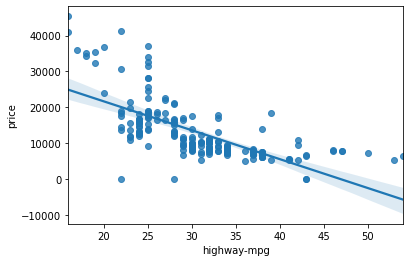

In [109]:
sns.regplot(x="highwaympg",y="price",data=df) # plotting regression plot pred var on x and target var on y

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

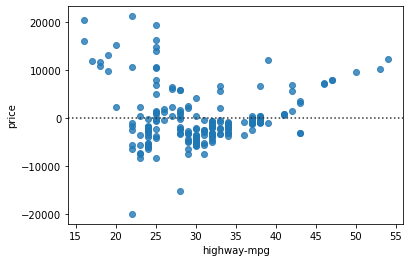

In [144]:
sns.residplot(df['highwaympg'],df['price']) # plotting residual plot for examining error b/w actual values
# examining predicted and target value (mean,variance,plot deviations)

<AxesSubplot:xlabel='price'>

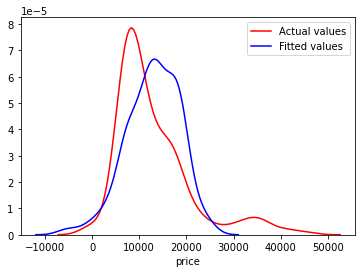

In [145]:
# plotting distribution plots which tells the count b/w predicted and targer values (then compare)
ax1= sns.distplot(df['price'],hist=False , color= "r", label = "Actual values") # 1st plot (For actual values)
sns.distplot(yhat,hist=False, color="b", label= "Fitted values",ax=ax1) # 2nd plot (For fitted values)

In [535]:
x=df['highwaympg'] # assigning predictor variable x (here,highway-mpg)
y=df['price'] # assigning target variable y (here,price) i.e. using highway-mpg to predict price of a car

In [536]:
#Polynomial regression 
f=np.polyfit(x,y,3) # polyfit function in numpy for degree 3 (fitting/training the polynomial)

In [539]:
p=np.poly1d(f) # printing out the model after defining it
print(p)

        3         2
-1.495 x + 196.5 x - 8626 x + 1.334e+05


In [541]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    # Nothing too messy just defining the PlotPolly function

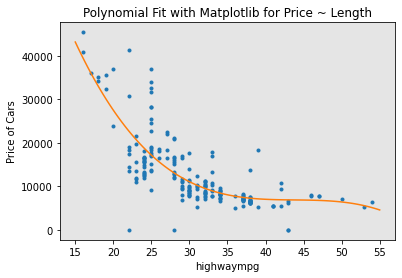

In [542]:
PlotPolly(p, x, y, 'highwaympg') 
#Plot the function (this poly model performs better than linear model as the function hits more of the data points)

In [544]:
from sklearn.preprocessing import PolynomialFeatures # import this for complicated expressions

In [545]:
pr=PolynomialFeatures(degree=2,include_bias=False) # This constructor takes degree of poly as a parameter 
pr

PolynomialFeatures(include_bias=False)

In [550]:
Z = df[['horsepower', 'curbweight', 'enginesize', 'highwaympg']]

In [553]:
x_polly=pr.fit_transform(Z) 
x_polly
#transform features into poly features using pr.fit_transform

array([[  111.,  2548.,   130., ..., 16900.,  3510.,   729.],
       [  154.,  2823.,   152., ..., 23104.,  3952.,   676.],
       [  102.,  2337.,   109., ..., 11881.,  3270.,   900.],
       ...,
       [  134.,  3012.,   173., ..., 29929.,  3979.,   529.],
       [  106.,  3217.,   145., ..., 21025.,  3915.,   729.],
       [  114.,  3062.,   141., ..., 19881.,  3525.,   625.]])

In [554]:
Z.shape #The original data is of 204 samples and 4 features

(204, 4)

In [555]:
x_polly.shape #After transformation = 204 samples and 14 features

(204, 14)

In [626]:
from sklearn.preprocessing import StandardScaler #for normalizing each feature simultaneously

In [627]:
SCALE = StandardScaler() # Train the model

In [632]:
x_data=df['enginesize']

In [641]:
SCALE.fit(x_data[['horsepower','highwaympg']]) # Fit the model

KeyError: "None of [Index(['horsepower', 'highway-mpg'], dtype='object')] are in the [index]"

In [607]:
x_scale=SCALE.transform(x_data[['horsepower','highwaympg']]) # transform the data into a new df on array x_scale

KeyError: "None of [Index(['horsepower', 'highwaympg'], dtype='object')] are in the [index]"

In [561]:
#Pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# import from all modules first

In [563]:
from sklearn.pipeline import Pipeline # import Pipeline module 

In [564]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
# Create tupples where first element is estimator/model and second element is model constructor

In [566]:
pipe=Pipeline(Input) # Creating pipeline object
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [573]:
pipe.fit(Z,y) # Train the model

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [576]:
yhat=pipe.predict(Z) # Prediction 
yhat[0:4]# First few elements only
# This method normalizes the data , performs polynomial transform and outputs a prediction

array([13725.41065662, 17812.58867066, 10784.3390612 , 16409.66504347])

In [318]:
# MSE and R-squared (2 methods to determine fit of a model)
from sklearn.metrics import mean_squared_error # Import MSE form sklearn.metrics

In [319]:
mean_squared_error(df['price'],y1) # Calculate MSE b/w actual val and predicted value

34420380.05866224

In [500]:
X = df[['highwaympg']] 
Y = df['price']
#X and Y are variables b/w which we want to get the R^2 error

In [321]:
lm.fit(X,Y)
lm.score(X,y) # Find R squared value using the score method in lr object

0.47335032287086654

In [468]:
#Prediction and decision making
import matplotlib.pyplot as plt
import numpy as np
new_input=np.arange(1,101,1).reshape(-1,1) 
# Generate sequence of values in specific range

In [469]:
print(new_input) # print the range

[[  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]]


In [470]:
lm.fit(X, Y)
lm 
# train the model

LinearRegression()

In [471]:
yhat=lm.predict(new_input)
yhat[0:5]
# predict the model

array([36992.7178378 , 36184.98254405, 35377.24725031, 34569.51195656,
       33761.77666282])

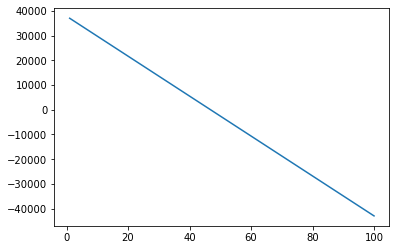

In [472]:
plt.plot(new_input, yhat)
plt.show()
#plot the values of the model